In this notebook, I have used **FbProphet** model to predict Google's Stock price in the future. The stock I have taken is GOOGL which is the  
Class A stock of Alphabet Inc and it comes with voting power unlike Class C stock of the same conglomerate with ticker 'GOOG'.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset using pandas
data = pd.read_csv("GOOGL.csv") 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2016-03-01,721.299988,742.330017,718.640015,742.169983,742.169983,3005600,0.000000
1,2016-03-02,742.869995,743.119995,733.250000,739.479980,739.479980,1814600,-0.003638
2,2016-03-03,739.479980,741.000000,729.630005,731.590027,731.590027,2026700,-0.010785
3,2016-03-04,734.799988,735.000000,725.619995,730.219971,730.219971,2425800,-0.001876
4,2016-03-07,725.150024,727.210022,705.140015,712.799988,712.799988,3084500,-0.024439


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,1135.342099,1146.469752,1124.489874,1135.962457,1135.962457,1.793468e+06,0.000657
std,289.386149,294.342059,285.742889,290.158327,290.158327,8.380385e+05,0.016752
min,682.489990,683.330017,672.659973,681.140015,681.140015,4.656000e+05,-0.131659
25%,938.605011,943.877503,931.062500,937.885010,937.885010,1.273775e+06,-0.005807
50%,1109.320007,1118.294983,1094.380005,1105.690002,1105.690002,1.566550e+06,0.001207
75%,1259.162537,1273.839996,1249.772491,1260.689972,1260.689972,2.014750e+06,0.008911
max,2107.790039,2145.139893,2093.330078,2118.620117,2118.620117,7.039900e+06,0.087760


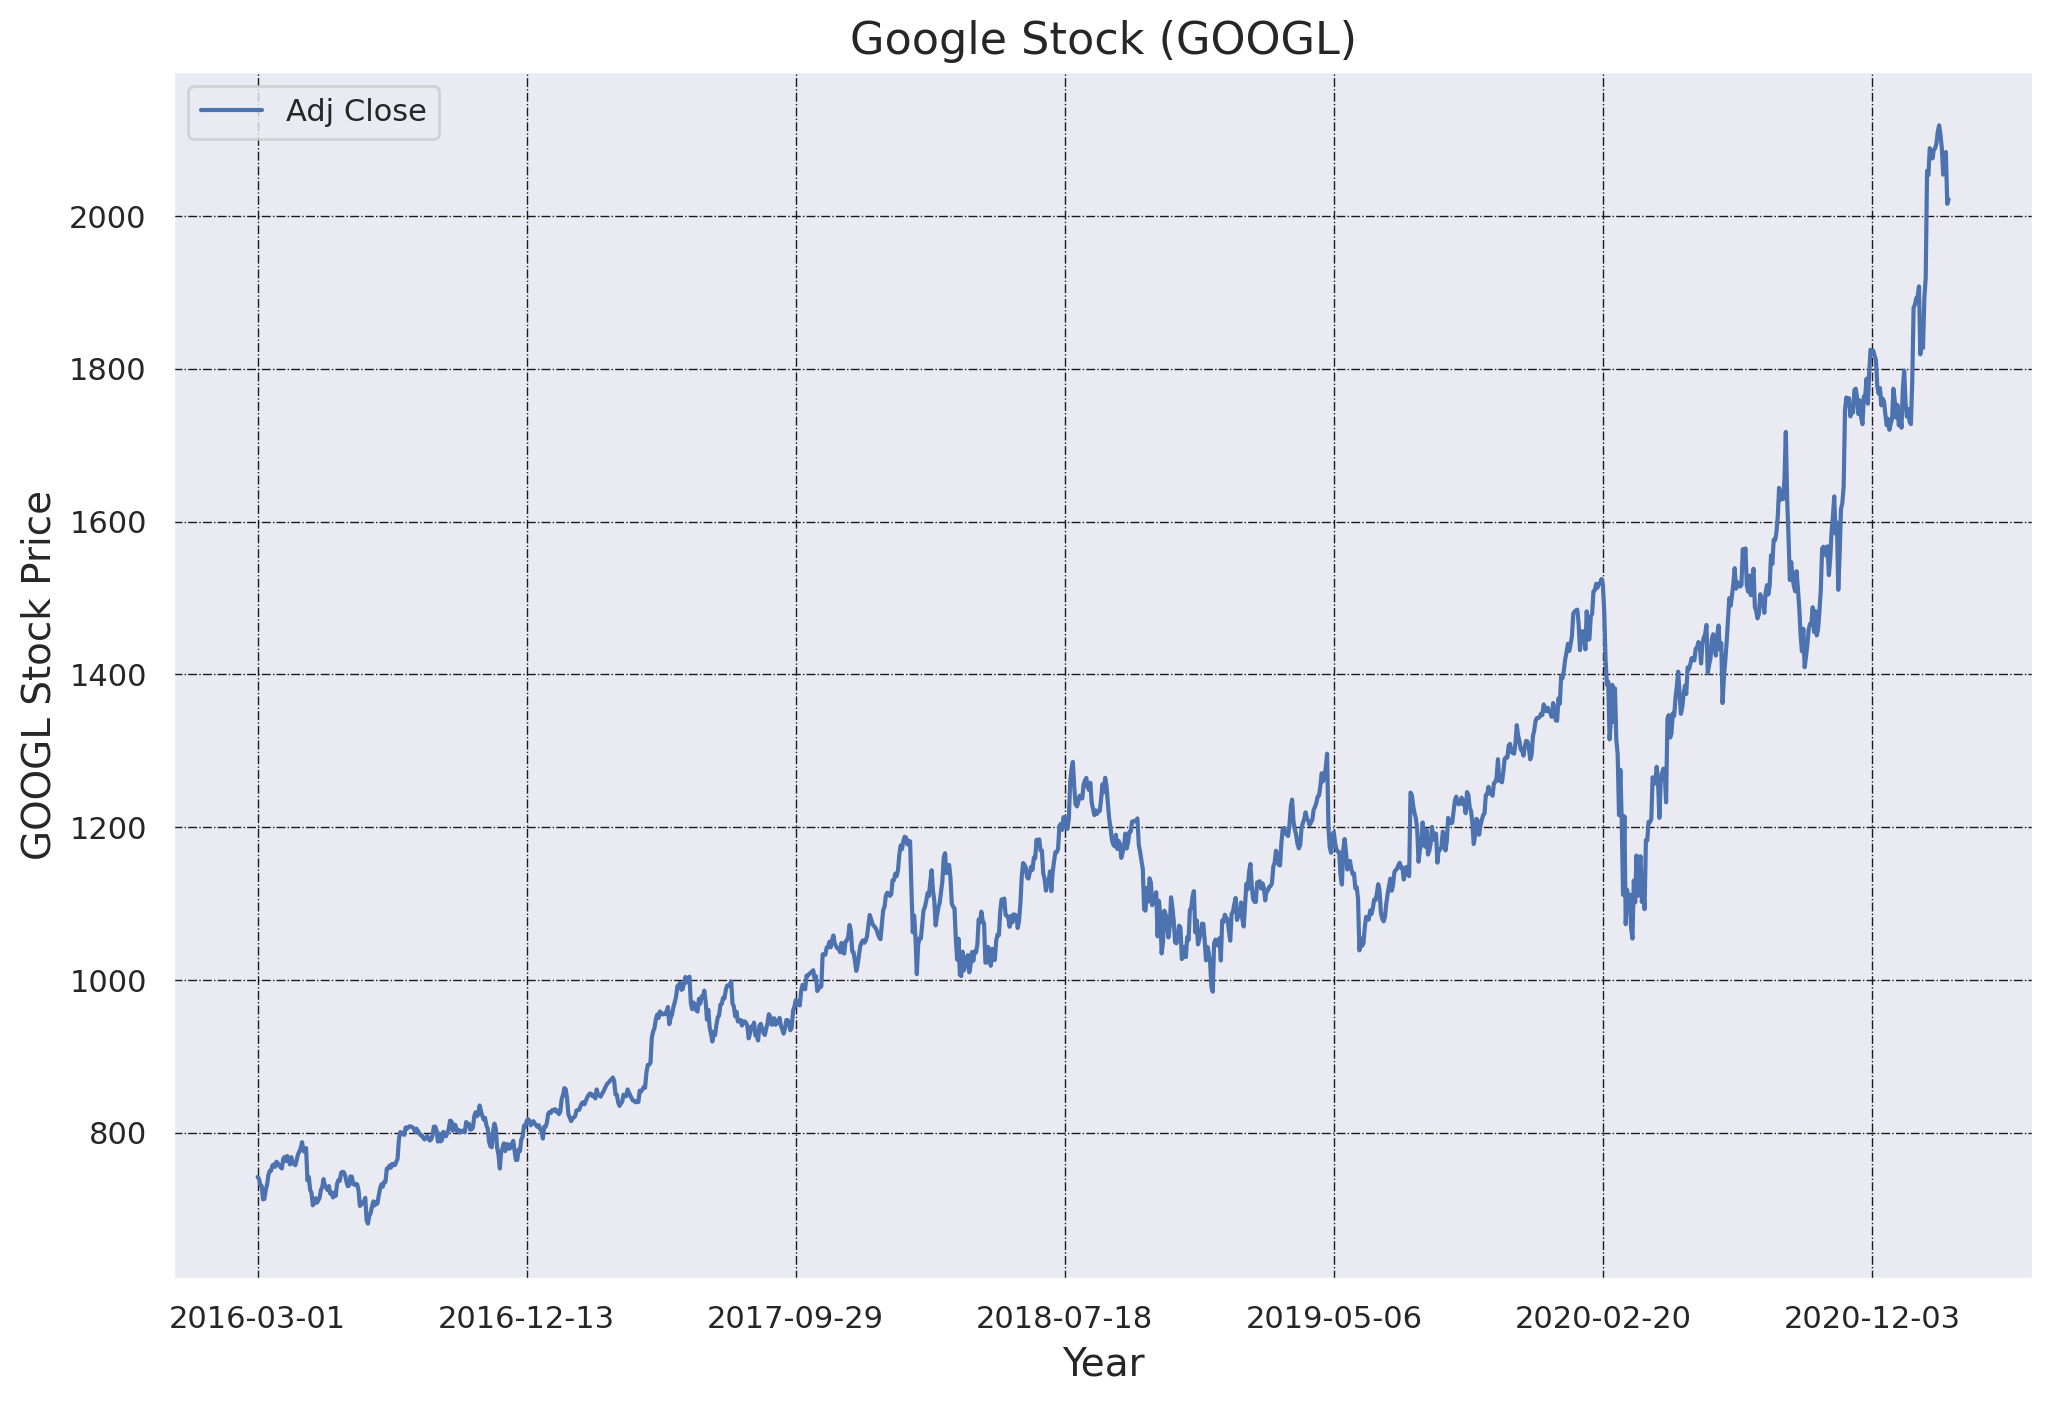

In [ ]:
sns.set()
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200


data.plot(x='Date',y='Adj Close',grid=False)
plt.title("Google Stock (GOOGL)", fontsize=16)
plt.ylabel('GOOGL Stock Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2016-03-01,742.169983
1,2016-03-02,739.479980
2,2016-03-03,731.590027
3,2016-03-04,730.219971
4,2016-03-07,712.799988


In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


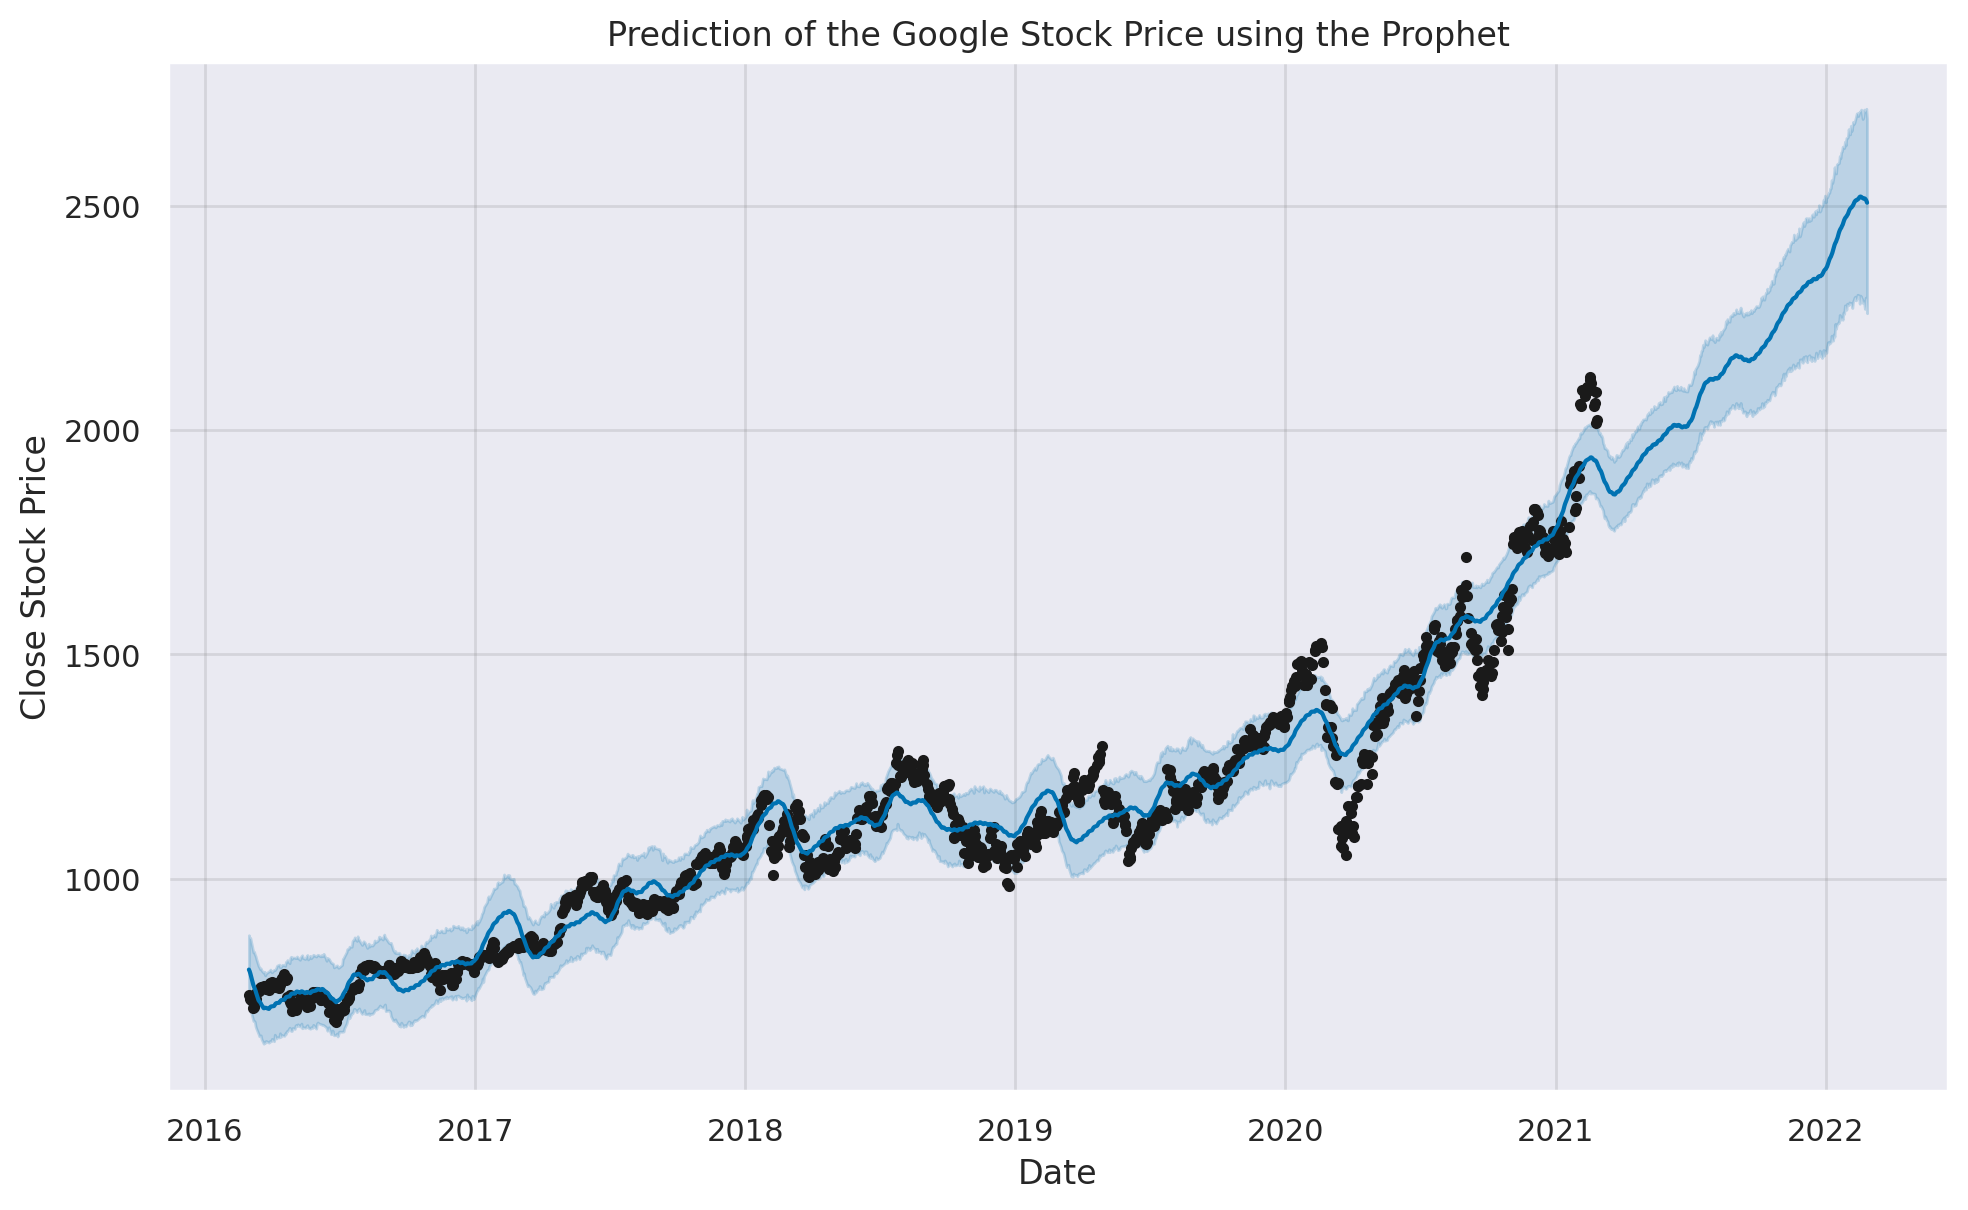

In [ ]:
sns.set()


future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

The model used all the data for the training (black dots) and predicted the future stock price from Feb 2021 till Feb 2022 ! Blue shadow is the confidence interval.

**Conclusion:** It seems that the GOOGL Stock price will be around 2500 in Feb 2022 based on the model’s prediction.  
  
**Side Note:** In this case, **we cannot measure the error of the model**. If someone wanted to do that, then they should split the data into training and test sets, fit the model using the training set only, predict the prices of the test set and then measure the error using the ground truth price values of the test set.  
  
**Observation:** Huge drop in March 2020 due to the COVID-19 lockdown.

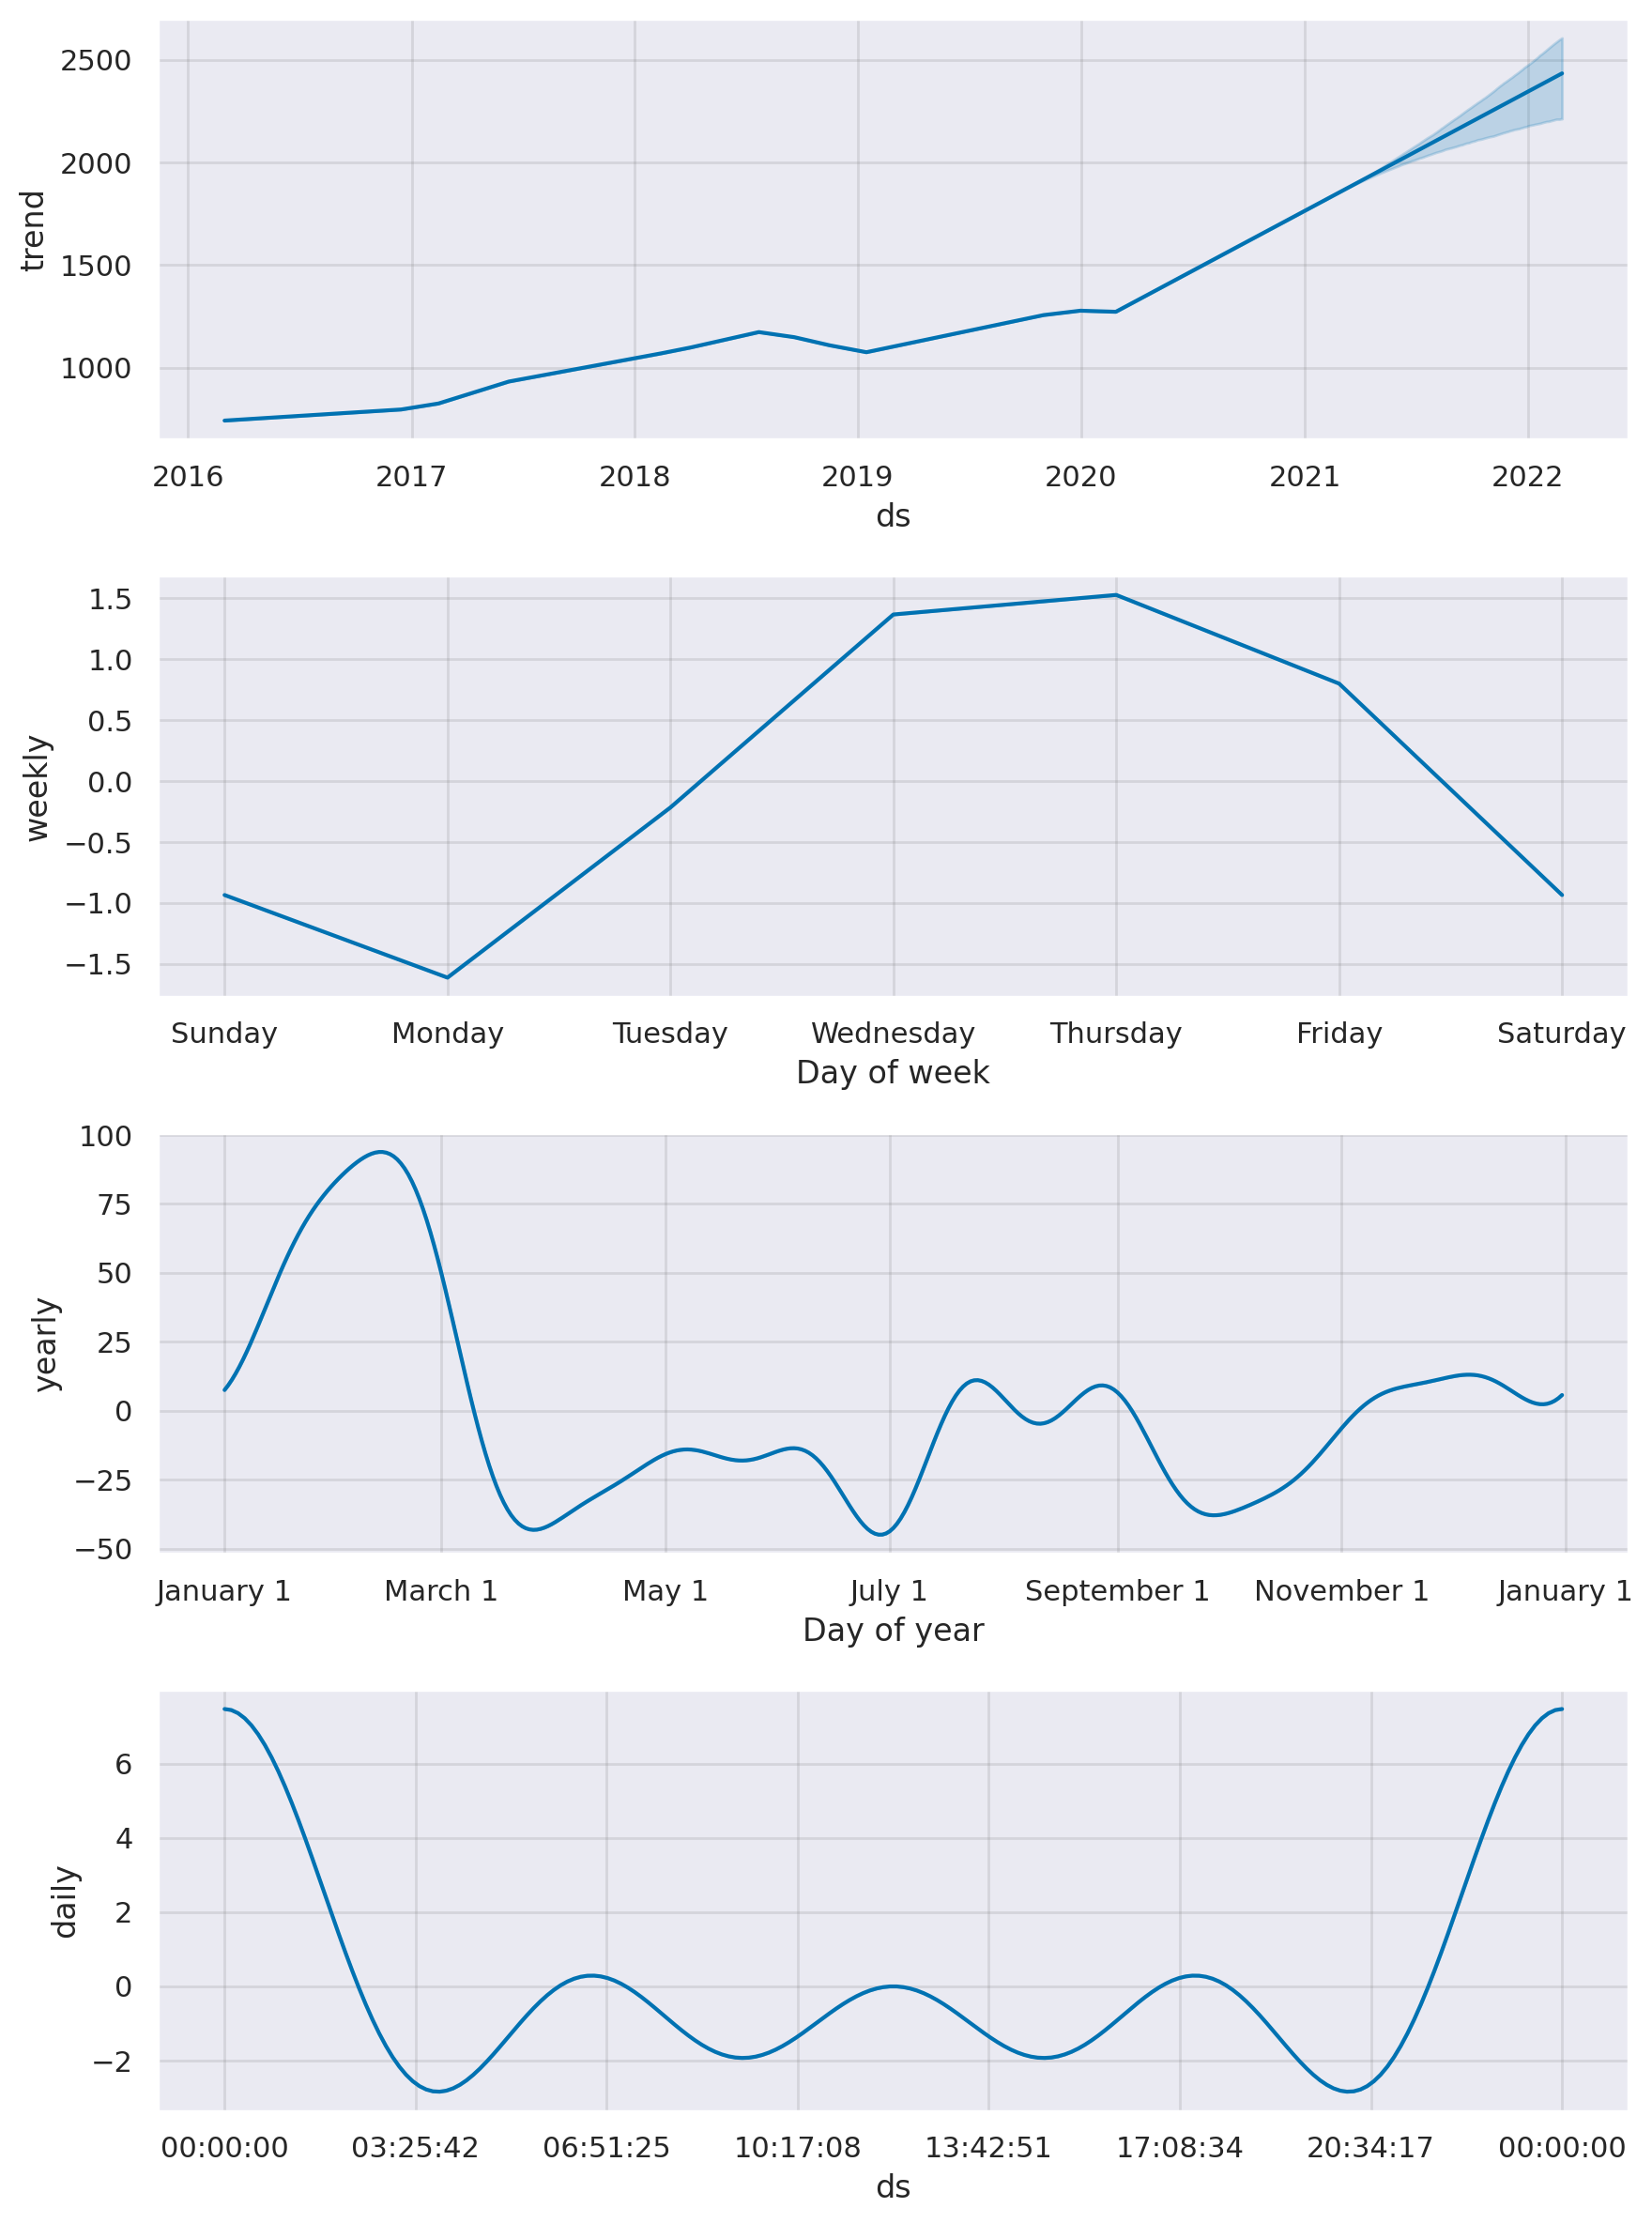

In [ ]:
m.plot_components(prediction)
plt.show()

Based on the estimated trends, we can see that usually the stock price is maximum in late February (see 3rd subplot) and mostly on Thursdays (see 2nd subplot). Finally, the 1st subplot shows an increase of the stock price in the near future (between Feb 2021 and Feb 2022).
